# Infinite-$n$ ideal ballooning stability optimization

This tutorial demonstrates how to evaluate and optimize an equilibrium for infinite-$n$ ideal-ballooning stability with DESC.
The infinite-$n$ ideal ballooning equation is

$$
\mathbf{B} \cdot \nabla \left( \frac{|\nabla \alpha|^2}{B^2} \mathbf{B} \cdot \nabla X \right) + 2 \frac{d \mu_0 p}{d\psi} \left[\mathbf{B} \times (\mathbf{b} \cdot \nabla \mathbf{b})\right] \cdot \nabla \alpha\, X = \lambda \frac{|\nabla \alpha|^2}{B^2} X, \quad \lambda = -\omega^2
$$

where $X$ is the ballooning eigenfunction whereas $\lambda$ is the ballooning eigenvalue. When $\lambda > 0$, the mode is ballooning-unstable, otherwise it is ballooning-stable. The equation is solved subject to Dirichlet boundary conditions on the eigenfunction $X$

$$X(\zeta = \zeta_1) = 0, X(\zeta = \zeta_2) = 0$$

where $\zeta_1$ and $\zeta_2$ are endpoints of the domain in ballooning space (a transformed covering space where $\zeta \in [0, 2\pi]$ to $\zeta \in [-\infty, \infty]$). Note that the ballooning $\zeta$ is technically a different coordinate than periodic $\zeta$

Numerically, this equation becomes a 1D EVP (eigenvalue problem) along a field line. 

$$ \frac{d}{d\zeta} \left(g \frac{dX}{d\zeta} \right) + c X = \lambda f X$$

where 

$$
\begin{eqnarray}
    \text{g} &=& (\mathbf{b} \cdot \nabla \zeta) \frac{|\nabla \alpha|^2}{B}, \\
    \text{c} &=& \frac{1}{B^2} \frac{d(\mu_0 p)}{d\psi} \frac{2}{(\mathbf{b} \cdot \nabla \zeta)} (\mathbf{b} \times (\mathbf{b} \cdot \nabla \mathbf{b})) \times \nabla \alpha, \\
    \text{f} &=& \frac{1}{(\mathbf{b} \cdot \nabla \zeta)} \frac{|\nabla \alpha|^2}{B^3},
\end{eqnarray}
$$


In [1]:
import sys
import os

sys.path.insert(0, os.path.abspath("."))
sys.path.append(os.path.abspath("../../../"))

If you have access to a GPU, uncomment the following two lines. 

In [2]:
# from desc import set_device
# set_device("gpu")

In [33]:
import matplotlib.pyplot as plt
import numpy as np

from desc.vmec import VMECIO

from desc.backend import jnp
from desc.equilibrium import Equilibrium
from desc.equilibrium.coords import compute_theta_coords
from desc.geometry import FourierRZToroidalSurface
from desc.grid import LinearGrid, Grid
from desc.magnetic_fields import OmnigenousField
from desc.objectives import (
    AspectRatio,
    FixIota,
    FixPressure,
    FixPsi,
    GenericObjective,
    BallooningStability,
    ObjectiveFunction,
)
from desc.plotting import *

plt.rcParams["font.size"] = 14

# Evaluating ballooning stability

In this section, we will show how you can take a DESC or VMEC equilibrium and evaluate its ballooning stability using DESC
You have to specify the normalized distance $\rho$ and the field line label $\alpha$ on which you want to solve the ballooning equation. 

DESC will solve the ballooning equation on multiple field lines on each flux surface and output the maximum ballooning growth rate on each flux surface. 

$$ \lambda_{\rho, \mathrm{max}} = \mathrm{max}_{\alpha}(\lambda_{\rho, \alpha}), \quad \forall \quad \alpha \in [0, \pi]$$ 

In [12]:
# Importing the HELIOTRON VMEC equilibrium
#eq = VMECIO.load("../../../tests/inputs/wout_HELIOTRON.nc")

# Importing the HELIOTRON DESC equilibrium
eq = Equilibrium.load("../../../desc/examples/HELIOTRON_output.h5")[-1]

# It is not necessary (but often useful) to re-solve your equilibrium to ensure that the force error is small
eq, _ = eq.solve(objective="force", verbose=3)

Building objective: force
Precomputing transforms
Timer: Precomputing transforms = 1.49 sec
Timer: Objective build = 4.85 sec
Building objective: lcfs R
Building objective: lcfs Z
Building objective: fixed Psi
Building objective: fixed pressure
Building objective: fixed iota
Building objective: fixed sheet current
Building objective: self_consistency R
Building objective: self_consistency Z
Building objective: lambda gauge
Building objective: axis R self consistency
Building objective: axis Z self consistency
Timer: Objective build = 2.25 sec
Timer: Linear constraint projection build = 3.38 sec
Number of parameters: 1593
Number of objectives: 4940
Starting optimization
Using method: lsq-exact
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1          3.874e-08                                    1.021e-02   
       1              5          3.702e-08      1.720e-09      3.374e-03      6.587e-03   
       2              6  

(<Figure size 2161.06x1440.71 with 12 Axes>,
 array([<Axes: title={'center': '$|\\mathbf{J} \\times \\mathbf{B} - \\nabla p|$ / $\\langle |\\nabla |B|^{2}/(2\\mu_0)| \\rangle_{vol}$, $\\phi \\cdot N_{FP}/2\\pi = 0.000$'}, xlabel='$R ~(\\mathrm{m})$', ylabel='$Z ~(\\mathrm{m})$'>,
        <Axes: title={'center': '$|\\mathbf{J} \\times \\mathbf{B} - \\nabla p|$ / $\\langle |\\nabla |B|^{2}/(2\\mu_0)| \\rangle_{vol}$, $\\phi \\cdot N_{FP}/2\\pi = 0.167$'}, xlabel='$R ~(\\mathrm{m})$', ylabel='$Z ~(\\mathrm{m})$'>,
        <Axes: title={'center': '$|\\mathbf{J} \\times \\mathbf{B} - \\nabla p|$ / $\\langle |\\nabla |B|^{2}/(2\\mu_0)| \\rangle_{vol}$, $\\phi \\cdot N_{FP}/2\\pi = 0.333$'}, xlabel='$R ~(\\mathrm{m})$', ylabel='$Z ~(\\mathrm{m})$'>,
        <Axes: title={'center': '$|\\mathbf{J} \\times \\mathbf{B} - \\nabla p|$ / $\\langle |\\nabla |B|^{2}/(2\\mu_0)| \\rangle_{vol}$, $\\phi \\cdot N_{FP}/2\\pi = 0.500$'}, xlabel='$R ~(\\mathrm{m})$', ylabel='$Z ~(\\mathrm{m})$'>,
        <Ax

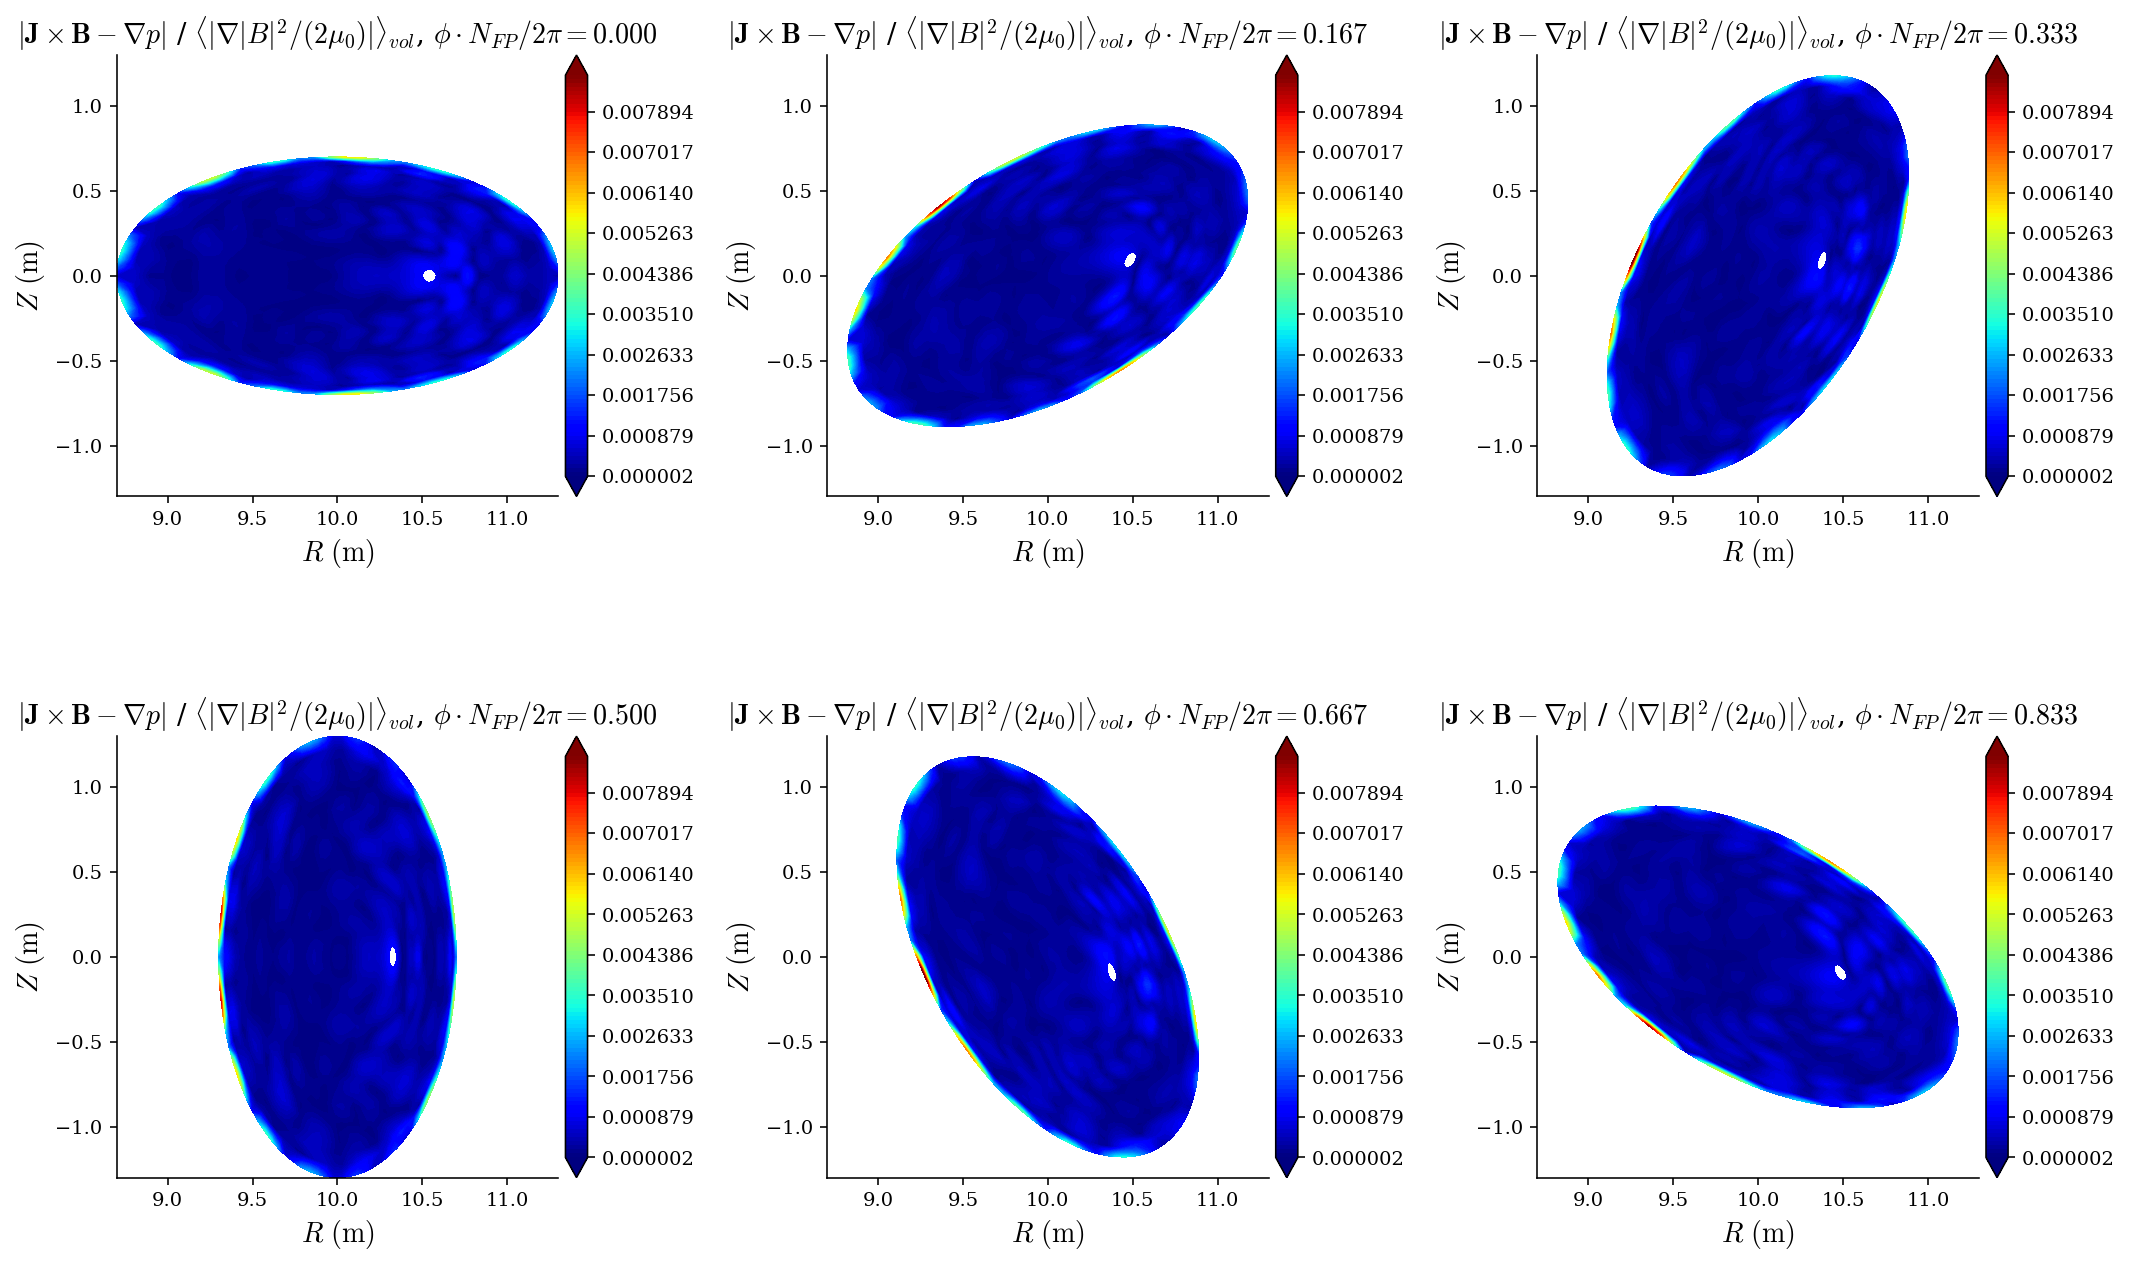

In [21]:
plot_section(eq, name="|F|", norm_F=True)

In [47]:
# Flux surfaces on which to evaluate ballooning stability
surfaces = [0.2, 0.4, 0.6, 0.8, 1.0]

grid = LinearGrid(rho = jnp.array(surfaces), NFP=eq.NFP)
eq_data_keys = ["iota"]

data = eq.compute(eq_data_keys, grid=grid)
iota = data["iota"]

Nalpha = int(7) # Number of field lines

# Field lines on which to evaluate ballooning stability
alpha = jnp.linspace(0, np.pi, Nalpha + 1, endpoint=False)

# Number of toroidal transits of the field line 
ntor = int(3)

# Number of point along a field line in ballooning space
N0 = int(1. * ntor * eq.M_grid * eq.N_grid + 1)

# range of the ballooning coordinate zeta
zeta = np.linspace(-jnp.pi*ntor, jnp.pi*ntor, N0)

gamma_max = np.zeros(len(surfaces), )
theta_PEST = np.zeros((N0*Nalpha,))
zeta_full = np.zeros((N0*Nalpha, ))

for j in range(len(surfaces)):
    rho = surfaces[j]*np.ones((N0*Nalpha, ))
    
    for i in range(Nalpha): 
        theta_PEST[N0*i:N0*(i+1)] = alpha[i] + iota[j] * zeta
        zeta_full[N0*i:N0*(i+1)] = zeta
        
    theta_coords = jnp.array([rho, theta_PEST, zeta_full]).T

    
    # Rootfinding theta for a given theta_PEST
    desc_coords = compute_theta_coords(
        eq, theta_coords, L_lmn=eq.L_lmn, tol=1e-8, maxiter=25
    )

    sfl_grid = Grid(desc_coords, sort=False)
    ball_data0 = eq.compute(["ideal_ball_gamma2"], grid=sfl_grid, override_grid=True)["ideal_ball_gamma2"]    
    gamma_max[j] = np.max(ball_data0)
    print(f"surf number {j} done!")

print("Growth rate cl")

None
> /tmp/ipykernel_528377/2033025363.py(41)<module>()
     39 
     40     # Rootfinding theta for a given theta_PEST
---> 41     desc_coords = compute_theta_coords(
     42         eq, theta_coords, L_lmn=eq.L_lmn, tol=1e-8, maxiter=25
     43     )



ipdb>  c


/home/rgaur/DESC_fork/DESC/desc/transform.py:69: UserWarning:

Unequal number of field periods for grid 1 and basis 19.

/home/rgaur/DESC_fork/DESC/desc/transform.py:69: UserWarning:

Unequal number of field periods for grid 1 and basis 19.



AssertionError: 

## Plotting the maximum ballooning growth rate

After finishing an optimization, we plot the maximum ballooning growth rate $\lambda_{\mathrm{max}}$ on the chosen flux surfaces

In [4]:
plt.plot(rho, gamma_max)
plt.xlabel(r"$\rho$", fontsize=16)
plt.ylabel(r"$\lambda_{\mathrm{max}}$", fontsize=16)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

NameError: name 'plt' is not defined

Note that the ballooning instability is driven by a pressure gradient. In the edge, if $p = 0$ but $dp/d\rho \neq 0$, we can still have a finite ballooning growth rate.
As a corollary, for vacuum equilibria or on equilibria with $dp/d\rho = 0$, the ballooning growth rate $\lambda <= 0$

# Optimizing for ballooning stability

Next, we explain how to take an existing ballooning unstable equilibirum and optimize it for ideal ballooning stability using DESC. The process is similar to other tutorials where you add the ballooning objective to the list of objective functions.

In [ ]:
objective = ObjectiveFunction(
    (
        # target major radius of R0=1 m
        GenericObjective("R0", eq=eq, target=1.0, name="major radius"),
        # target aspect ratio R0/a<=10
        AspectRatio(eq=eq, bounds=(0, 10)),
        #  ballooning stability
        BallooningStability(
            eq=eq,
        ),
    )
)

# Relation to $\delta\! f$ gyrokinetics

The coefficients used by our ballooning solver are the exact same set used by any $\delta\! f$ gyrokinetic solver. Below we will specify the list and plot seven coefficients used by the GX gyrokinetics solver

$$ \mathrm{gradpar} = \mathbf{b}\cdot \mathbf{\nabla}\zeta $$
$$ g^{aa} = \lvert \mathbf{\nabla} \alpha \rvert^2 $$
$$ g^{ra} = \mathbf{\nabla} \alpha \cdot \mathbf{\nabla} \rho $$
$$ g^{rr} = \lvert \mathbf{\nabla} \rho \rvert^2$$
$$ \mathrm{cvdrift} =  \frac{1}{B^3}[\mathbf{b} \times (\mathbf{b}\cdot \mathbf{\nabla}\mathbf{b})] \cdot \mathbf{\nabla} \alpha = \frac{1}{B^4}[\mathbf{b} \times \left(\mu_0 p + B^2/2\right)] \cdot \mathbf{\nabla} \alpha$$
$$ \mathrm{cvdrift} =  \frac{1}{B^2}(\mathbf{b} \times \mathbf{\nabla}B) \cdot \mathbf{\nabla} \alpha$$
$$ \mathrm{cvdrift_0} = \frac{1}{B^2}(\mathbf{b} \times \mathbf{\nabla}B) \cdot \mathbf{\nabla} \iota$$

In [ ]:
# Field-aligned grid for a given alpha
grid = 
data_keys = ["B_sup_zeta", "|B|", "g^aa", "g^ra", "g^rr", "cvdrift", "gbdrift", "cvdrift0"]
data = eq.compute(data_keys, override_grid=False)

plt.plot(zeta, data["|B|"])



